# Introduction to Anomaly Detection in Python

In [120]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
# it will be used only 1st time

# pip install Faker

In [122]:
# Import Faker
from faker import Faker
fake = Faker()

In [123]:
# To ensure the results are reproducible
fake.seed(4321)

names_list = []

fake = Faker()
for _ in range(100):
  names_list.append(fake.name())

In [124]:
# To ensure the results are reproducible
np.random.seed(7)

salaries = []
for _ in range(100):
    salary = np.random.randint(1000,2500)
    salaries.append(salary)


In [125]:
# Create pandas DataFrame
salary_df = pd.DataFrame(
    {'Person': names_list,
     'Salary (in USD)': salaries
    })

In [126]:
salary_df.shape

(100, 2)

In [127]:
# Print a subsection of the DataFrame
print(salary_df.head())

              Person  Salary (in USD)
0        Jason Brown             1175
1        Jacob Stein             2220
2         Cody Brown             1537
3      Larry Morales             1502
4  Jessica Hendricks             1211


In [128]:
salary_df.describe()

,Salary (in USD)
count,100.000000
mean,1784.050000
std,427.311123
min,1021.000000
25%,1398.250000
50%,1785.500000
75%,2155.750000
max,2498.000000


In [129]:
salary_df.at[16, 'Salary (in USD)'] = 23
salary_df.at[65, 'Salary (in USD)'] = 17

In [130]:
# Verify if the salaries were changed
print(salary_df.loc[16])
print(salary_df.loc[65])

Person             Miss Amanda Harris MD
Salary (in USD)                       23
Name: 16, dtype: object
Person             Joyce Bishop
Salary (in USD)              17
Name: 65, dtype: object


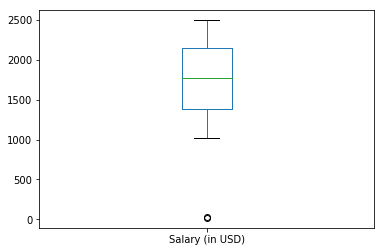

In [131]:
# Generate a Boxplot
salary_df['Salary (in USD)'].plot(kind='box')
plt.show()

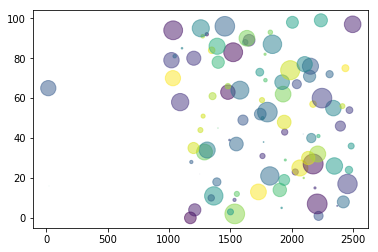

In [148]:
N = 100
colors = np.random.rand(N)
area = (20 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(salary_raw, np.arange(0,100), s=area, c=colors, alpha=0.5)
plt.show()


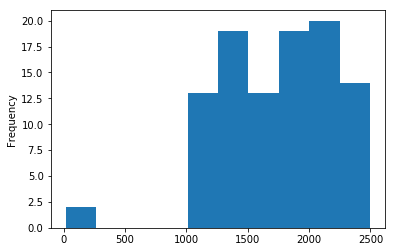

In [132]:
# Generate a Histogram plot
salary_df['Salary (in USD)'].plot(kind='hist')
plt.show()

In [133]:
# Minimum and maximum salaries
print('Minimum salary ' + str(salary_df['Salary (in USD)'].min()))
print('Maximum salary ' + str(salary_df['Salary (in USD)'].max()))

Minimum salary 17
Maximum salary 2498


In [29]:
# Convert the salary values to a numpy array
salary_raw = salary_df['Salary (in USD)'].values

In [30]:
salary_raw

array([1175, 2220, 1537, 1502, 1211, 1919, 2372, 2209, 2422, 1535, 1345,
       1366, 1554, 1730, 1904, 2191,   23, 2456, 1391, 1940, 2099, 1823,
       1250, 2030, 2468, 2068, 2349, 2176, 1183, 1949, 2136, 1763, 2213,
       1290, 1312, 1201, 2486, 1550, 1772, 1494, 2161, 2219, 2096, 1944,
       1257, 1400, 2398, 2373, 1940, 1604, 1764, 1279, 1745, 1803, 2472,
       2341, 2415, 2175, 1092, 1759, 2248, 1356, 1931, 1481, 1579,   17,
       1481, 2043, 1923, 1787, 1033, 2147, 2310, 1741, 1989, 2439, 2154,
       2107, 1402, 1021, 1203, 1047, 1784, 1524, 1349, 1107, 1393, 1844,
       1622, 1654, 1636, 1276, 1309, 1827, 1035, 1260, 1456, 2498, 2007,
       2239], dtype=int64)

In [31]:
# For compatibility with the SciPy implementation
salary_raw = salary_raw.reshape(-1, 1)
salary_raw = salary_raw.astype('float64')

In [32]:
salary_raw

array([[1175.],
       [2220.],
       [1537.],
       [1502.],
       [1211.],
       [1919.],
       [2372.],
       [2209.],
       [2422.],
       [1535.],
       [1345.],
       [1366.],
       [1554.],
       [1730.],
       [1904.],
       [2191.],
       [  23.],
       [2456.],
       [1391.],
       [1940.],
       [2099.],
       [1823.],
       [1250.],
       [2030.],
       [2468.],
       [2068.],
       [2349.],
       [2176.],
       [1183.],
       [1949.],
       [2136.],
       [1763.],
       [2213.],
       [1290.],
       [1312.],
       [1201.],
       [2486.],
       [1550.],
       [1772.],
       [1494.],
       [2161.],
       [2219.],
       [2096.],
       [1944.],
       [1257.],
       [1400.],
       [2398.],
       [2373.],
       [1940.],
       [1604.],
       [1764.],
       [1279.],
       [1745.],
       [1803.],
       [2472.],
       [2341.],
       [2415.],
       [2175.],
       [1092.],
       [1759.],
       [2248.],
       [1356.],
       [

In [90]:
# Import kmeans from SciPy
from scipy.cluster.vq import kmeans, vq
from numpy import array
from scipy.cluster.vq import vq
from pylab import plot,show

In [117]:
# Specify the data and the number of clusters to kmeans()

# computing K-Means with K = 4 (4 clusters)
centroids,_ = kmeans(salary_raw, 4)
# assign each sample to a cluster
idx,_ = vq(salary_raw,centroids)


In [118]:
# check clusters of observation
print(idx)

[2 0 1 2 2 1 0 0 0 1 2 2 1 1 1 0 3 0 2 1 0 1 2 0 0 0 0 0 2 1 0 1 0 2 2 2 0
 1 1 2 0 0 0 1 2 2 0 0 1 1 1 2 1 1 0 0 0 0 2 1 0 2 1 2 1 3 2 0 1 1 2 0 0 1
 1 0 0 0 2 2 2 2 1 2 2 2 2 1 1 1 1 2 2 1 2 2 2 0 1 0]


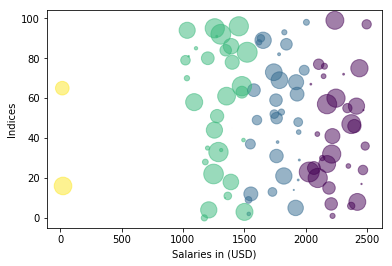

In [149]:
N = 100
colors1 = np.random.rand(N)
area = (20 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(salary_raw, np.arange(0,100), c=idx, s=area, alpha=0.5)
plt.xlabel('Salaries in (USD)')
plt.ylabel('Indices')
plt.show()